In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from glob import glob
import os
import sys

import h5py
import numpy as np

from tsne import bh_sne

In [2]:
data_h5 = h5py.File('/home/ubuntu/speech2vec/raw_data/dsp_hw2/data.h5','r')
labels = data_h5['labels'][:]
gender = data_h5['genders'][:]
data_h5.close()

tone_labels = []
tone_dict = { 0: 1, 1:0, 2:3, 3:0, 4:3, 5:2, 6:3, 7:0, 8:0, 9:2 }
for digit in labels:
    tone = tone_dict[ digit ]
    tone_labels.append(tone)
tone_labels = np.array(tone_labels)

### Specify code location

##### Seq2seq AE

In [3]:
h5_file = './result/dsp_hw2/fbank_delta_Seq2seqAutoencoder_BasicLSTMCell1_BasicLSTMCell1_hidden_128_encode_dim10/epoch1000.h5'

#### Seq2seq VAE

In [7]:
h5_file = './result/dsp_hw2/fbank_delta_VariationalSeq2seqAutoencoder_BasicLSTMCell1_BasicLSTMCell1_hidden_128_encode_dim2/epoch1000.h5'

#### CNN AE

In [14]:
h5_file = './result/dsp_hw2/fbank_CNNAE_nb_epochs1000_batch_size16_intermediate_dim128_nb_conv3_latent_dim10_nb_filters32/epoch800.h5'

#### CNN VAE

In [22]:
h5_file = './result/dsp_hw2/fbank_CNN_nb_epochs1000_batch_size16_intermediate_dim128_nb_conv3_latent_dim2_nb_filters32/epoch950.h5'

#### CNN AE fbank_delta_yphase

In [7]:
h5_file = './result/dsp_hw2/fbank_delta_yphase/CNNAutoencoder_batch16_hidden128_encode10_filter32_conv3/eval_epoch200.h5'

#### CNN VAE fbank_delta_yphase

In [3]:
h5_file = './result/dsp_hw2/fbank_CNN_nb_epochs1000_batch_size16_intermediate_dim128_nb_conv3_latent_dim2_nb_filters32/epoch900.h5'

### Load code

In [8]:
h5_handle = h5py.File(h5_file,'r')
code = h5_handle['code'][:]
print code.shape

h5_handle.close()

if code.shape[1] == 2:
    tsne_code = code
else:
    print("Performing TSNE...")
    tsne_code = bh_sne(code.astype('float64'))

(708, 10)
Performing TSNE...


### Plot with pandas dataframe

In [9]:
import pandas as pd

values = np.hstack([ tsne_code, labels[:,None], gender[:,None],tone_labels[:,None]])

df = pd.DataFrame(values, index=range(values.shape[0]), columns=['x','y','digit','gender','tone'] )

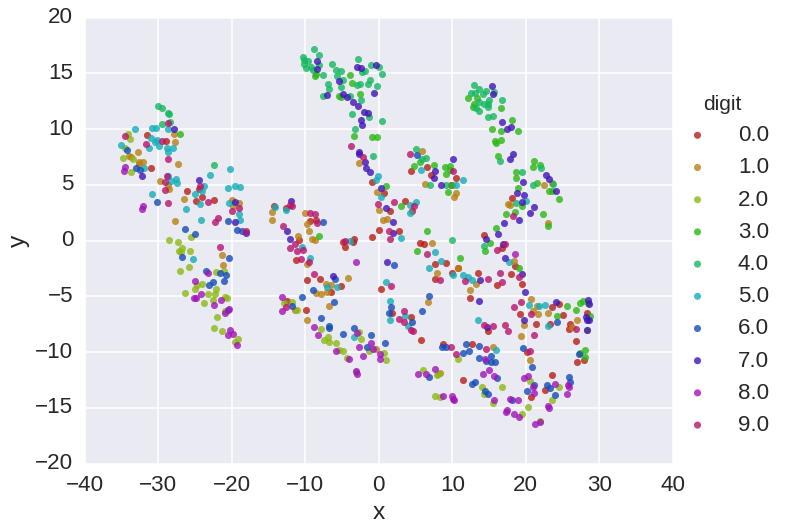

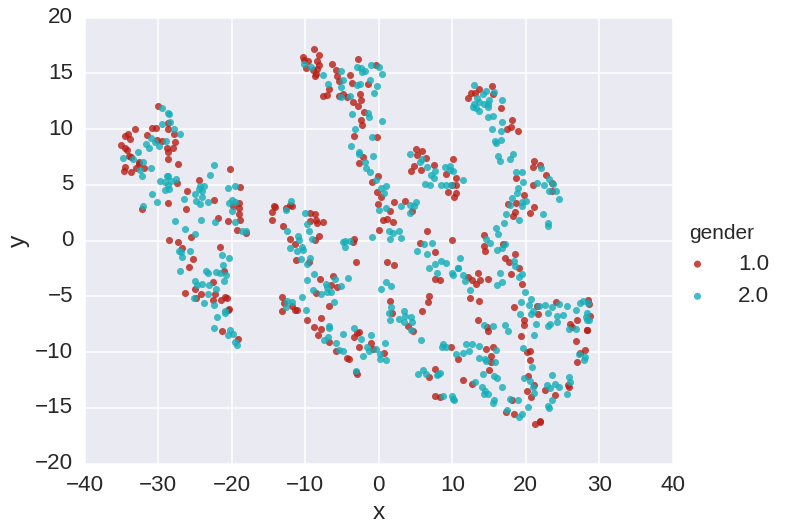

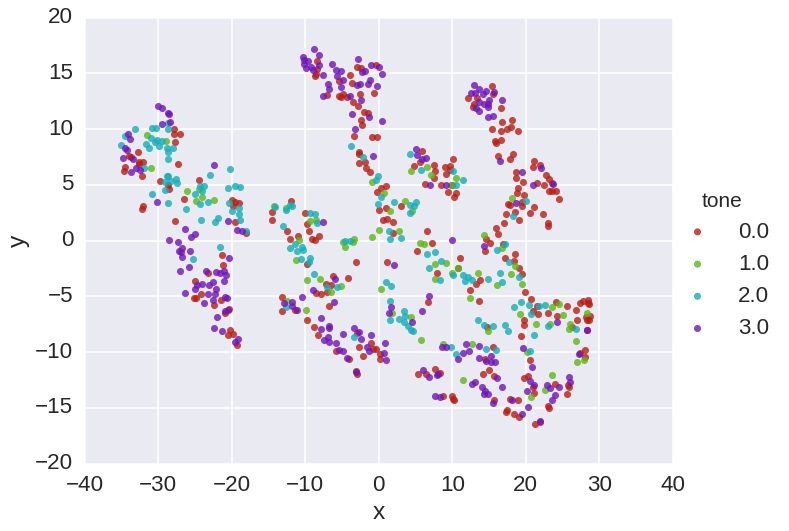

In [10]:
import seaborn as sns
sns.set_context("poster", font_scale=1.4)
sns.set_style("darkgrid")

sns.lmplot('x', 'y', 
           data=df,
           hue='digit',
           fit_reg=False,
           palette=sns.hls_palette(10, l=.4, s=0.8),
           size=8,
           aspect=1.25,
           scatter_kws={"s": 50}
          )

sns.lmplot('x', 'y', 
           data=df,
           hue='gender',
           fit_reg=False,
           palette=sns.hls_palette(2, l=.4, s=0.8),
           size=8,
           aspect=1.25,
           scatter_kws={"s": 50}
          )

sns.lmplot('x', 'y', 
           data=df,
           hue='tone',
           fit_reg=False,
           palette=sns.hls_palette(4, l=.4, s=0.8),
           size=8,
           aspect=1.25,
           scatter_kws={"s": 50}
          )

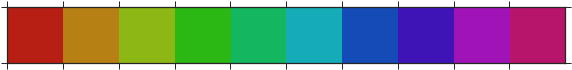

In [55]:
sns.palplot(sns.hls_palette(10, l=.4, s=0.8))